# TRAFICOM OPEN DATA 12th of February,2023

Rows 5 163 487

Date ending 31.12.2022

Published 24th February 2023

https://tieto.traficom.fi/fi/tietotraficom/avoin-data?toggle=Ajoneuvojen%20avoin%20data

### Importing libraries and data from Traficom open data website

In [1]:
import pandas as pd
from datetime import datetime

import requests
url = "https://opendata.traficom.fi/Content/Ajoneuvorekisteri.zip"
r = requests.get(url)
with open("Ajoneuvorekisteri.zip",'wb') as file:
    file.write(r.content)

### Importing data

In [2]:
import pandas as pd
from datetime import datetime

#df = pd.read_csv('Ajoneuvorekisteri.zip', sep=';', encoding='ISO8859-1', usecols=cols)
df = pd.read_csv('Ajoneuvorekisteri.zip', sep=';', encoding='ISO8859-1')

C:\Users\Marko\anaconda3\envs\HH\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (18,27,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Eyeballing data

data starts 1st of January 1976 and ends 31st of December 2022

In [3]:
df.tail(5)

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,variantti,versio,kayttoonottopvm,vari,ovienLukumaara,korityyppi,...,tyyppihyvaksyntanro,yksittaisKayttovoima,kunta,NEDC_Co2,NEDC2_Co2,WLTP_Co2,WLTP2_Co2,matkamittarilukema,valmistenumero2,jarnro
5163481,M1,2022-12-30,NaN,1.0,ACCRMBX0,NFM6FM62Q025STVLN657,20160212,6,4.0,AC,...,e11*2007/46*0243*16,2.0,418.0,106.0,NaN,NaN,NaN,127393.0,TMBJJ9NEXG,5163482
5163482,L1,2022-12-30,109.0,1.0,NaN,NaN,19820000,9,NaN,NaN,...,NaN,1.0,286.0,NaN,NaN,NaN,NaN,2080.0,NaN,5163483
5163483,T3,2022-12-30,933.0,1.0,CF800ATR-3,A,20221230,NaN,NaN,NaN,...,e13*167/2013*00111*02,1.0,678.0,NaN,NaN,NaN,NaN,NaN,NaN,5163484
5163484,O2,2022-12-31,13.0,5.0,ARKA,350,20221231,NaN,NaN,DC,...,e4*2007/46*0274*08,NaN,202.0,NaN,NaN,NaN,NaN,NaN,NaN,5163485
5163485,O2,2022-12-31,13.0,1.0,KC000,000017A00DC1140,20221231,NaN,1.0,SE,...,e13*2007/46*1829*15,NaN,410.0,NaN,NaN,NaN,NaN,NaN,NaN,5163486


### Checking column names

In [4]:
df.columns

Index(['ajoneuvoluokka', 'ensirekisterointipvm', 'ajoneuvoryhma',
       'ajoneuvonkaytto', 'variantti', 'versio', 'kayttoonottopvm', 'vari',
       'ovienLukumaara', 'korityyppi', 'ohjaamotyyppi', 'istumapaikkojenLkm',
       'omamassa', 'teknSuurSallKokmassa', 'tieliikSuurSallKokmassa',
       'ajonKokPituus', 'ajonLeveys', 'ajonKorkeus', 'kayttovoima',
       'iskutilavuus', 'suurinNettoteho', 'sylintereidenLkm', 'ahdin',
       'sahkohybridi', 'sahkohybridinluokka', 'merkkiSelvakielinen',
       'mallimerkinta', 'vaihteisto', 'vaihteidenLkm', 'kaupallinenNimi',
       'voimanvalJaTehostamistapa', 'tyyppihyvaksyntanro',
       'yksittaisKayttovoima', 'kunta', 'NEDC_Co2', 'NEDC2_Co2', 'WLTP_Co2',
       'WLTP2_Co2', 'matkamittarilukema', 'valmistenumero2', 'jarnro'],
      dtype='object')

### Choosing only vehicles, passenger cars M1 ja M1G

In [5]:
df = df[df['ajoneuvoluokka'].isin(['M1', 'M1G'])]
df.head(5)

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,variantti,versio,kayttoonottopvm,vari,ovienLukumaara,korityyppi,...,tyyppihyvaksyntanro,yksittaisKayttovoima,kunta,NEDC_Co2,NEDC2_Co2,WLTP_Co2,WLTP2_Co2,matkamittarilukema,valmistenumero2,jarnro
2,M1,1984-07-09,NaN,1.0,NaN,NaN,19840000,1,NaN,NaN,...,NaN,1.0,179.0,NaN,NaN,NaN,NaN,NaN,NaN,3
5,M1,1990-05-08,NaN,5.0,NaN,NaN,19900508,9,NaN,NaN,...,NaN,1.0,91.0,NaN,NaN,NaN,NaN,NaN,VF7XBEY000,6
6,M1,2003-08-08,NaN,1.0,NaN,5365292375,20030808,2,NaN,AB,...,NaN,1.0,609.0,143.0,NaN,NaN,NaN,159443.0,VF1CB0FCF2,7
7,M1,2003-10-02,NaN,1.0,1,4,20031002,6,NaN,AA,...,e6*2001/116*0091*00,1.0,837.0,190.0,NaN,NaN,NaN,279326.0,JHMCL75403,8
8,M1,2006-03-17,NaN,1.0,ZZE121(W),ZZE121L-DWMNKW(1G),20060317,Y,NaN,AC,...,e11*2001/116*0181*06,1.0,989.0,172.0,NaN,NaN,NaN,145446.0,NMTEZ20E80,9


### Checking date printing correctly out

In [6]:
df['ensirekisterointipvm'] = pd.to_datetime(df['ensirekisterointipvm'], format = '%Y-%m-%d')
df.head(5)

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,variantti,versio,kayttoonottopvm,vari,ovienLukumaara,korityyppi,...,tyyppihyvaksyntanro,yksittaisKayttovoima,kunta,NEDC_Co2,NEDC2_Co2,WLTP_Co2,WLTP2_Co2,matkamittarilukema,valmistenumero2,jarnro
2,M1,1984-07-09,NaN,1.0,NaN,NaN,19840000,1,NaN,NaN,...,NaN,1.0,179.0,NaN,NaN,NaN,NaN,NaN,NaN,3
5,M1,1990-05-08,NaN,5.0,NaN,NaN,19900508,9,NaN,NaN,...,NaN,1.0,91.0,NaN,NaN,NaN,NaN,NaN,VF7XBEY000,6
6,M1,2003-08-08,NaN,1.0,NaN,5365292375,20030808,2,NaN,AB,...,NaN,1.0,609.0,143.0,NaN,NaN,NaN,159443.0,VF1CB0FCF2,7
7,M1,2003-10-02,NaN,1.0,1,4,20031002,6,NaN,AA,...,e6*2001/116*0091*00,1.0,837.0,190.0,NaN,NaN,NaN,279326.0,JHMCL75403,8
8,M1,2006-03-17,NaN,1.0,ZZE121(W),ZZE121L-DWMNKW(1G),20060317,Y,NaN,AC,...,e11*2001/116*0181*06,1.0,989.0,172.0,NaN,NaN,NaN,145446.0,NMTEZ20E80,9


### Choosing passenger cars registered only 2021 onwards

In [7]:
df = df[df['ensirekisterointipvm'] > '2020-12-31'].sort_values(by = 'ensirekisterointipvm')
df.head(5)

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,variantti,versio,kayttoonottopvm,vari,ovienLukumaara,korityyppi,...,tyyppihyvaksyntanro,yksittaisKayttovoima,kunta,NEDC_Co2,NEDC2_Co2,WLTP_Co2,WLTP2_Co2,matkamittarilukema,valmistenumero2,jarnro
4779586,M1,2021-01-01,NaN,5.0,FDGEAX0,FD6HFD6DD0014BIML1CBA,20210101,8,5.0,AC,...,e9*2007/46*3167*06,1.0,858.0,NaN,NaN,NaN,31.0,NaN,VSSZZZKLZM,4779587
4779589,M1,2021-01-01,NaN,1.0,FDGEAX0,FD6PFD6DD0014BIML1CBA,20210101,9,5.0,AC,...,e9*2007/46*3167*06,1.0,257.0,NaN,NaN,NaN,28.0,NaN,VSSZZZKLZM,4779590
4770597,M1,2021-01-01,NaN,1.0,MZEH12(W),MZEH12L-DWXNBW(3D),20210101,9,4.0,AC,...,e6*2007/46*0318*03,1.0,285.0,85.0,NaN,112.0,NaN,NaN,SB1Z53BE70,4770598
4751924,M1,2021-01-01,NaN,1.0,F5P91,D71BZ1,20210101,1,5.0,AC,...,e5*2007/46*1075*06,1.0,837.0,113.0,NaN,125.0,NaN,NaN,TMAH381DGM,4751925
4769064,M1,2021-01-01,NaN,1.0,AADGEAX0,RFD6FD6DD0014BIML3N1C0B,20210101,9,5.0,AA,...,e8*2007/46*0355*05,1.0,837.0,NaN,NaN,NaN,25.0,NaN,TMBAW8NX2M,4769065


### Removing unnecessary columns and checking number of rows and columns

In [8]:
df = df.drop(['ajoneuvoryhma', 'ajoneuvonkaytto', 'variantti', 'versio', 'ovienLukumaara', 'korityyppi', 'omamassa', 'teknSuurSallKokmassa', 'tieliikSuurSallKokmassa', 'ajonKokPituus', 'ajonLeveys', 'ajonKorkeus', 'suurinNettoteho', 'ahdin', 'tyyppihyvaksyntanro', 'valmistenumero2', 'jarnro', 'ohjaamotyyppi', 'istumapaikkojenLkm', 'sylintereidenLkm', 'vaihteidenLkm', 'voimanvalJaTehostamistapa', 'yksittaisKayttovoima', 'matkamittarilukema'], axis = 1)

df.shape

(252200, 17)

### Checking column names

In [9]:
df.columns

Index(['ajoneuvoluokka', 'ensirekisterointipvm', 'kayttoonottopvm', 'vari',
       'kayttovoima', 'iskutilavuus', 'sahkohybridi', 'sahkohybridinluokka',
       'merkkiSelvakielinen', 'mallimerkinta', 'vaihteisto', 'kaupallinenNimi',
       'kunta', 'NEDC_Co2', 'NEDC2_Co2', 'WLTP_Co2', 'WLTP2_Co2'],
      dtype='object')

### Saving as a csv file

In [10]:
df.to_csv('passengercars2023.csv', index = False)

In [11]:
pd.set_option.display_columns = None

### Importing new passenger cars dataset

In [12]:
df = pd.read_csv('passengercars2023.csv')
df.tail()

,ajoneuvoluokka,ensirekisterointipvm,kayttoonottopvm,vari,kayttovoima,iskutilavuus,sahkohybridi,sahkohybridinluokka,merkkiSelvakielinen,mallimerkinta,vaihteisto,kaupallinenNimi,kunta,NEDC_Co2,NEDC2_Co2,WLTP_Co2,WLTP2_Co2
252195,M1,2022-12-31,20180522,8,1.0,1498.0,False,NaN,Ford,KUGA Monikäyttöajoneuvo (AF) 4ov 1498cm3,1,KUGA,301.0,143.0,NaN,NaN,NaN
252196,M1,2022-12-31,20190309,6,1.0,999.0,False,NaN,Ford,Focus Farmari (AC) 4ov 999cm3,1,Focus,145.0,114.0,NaN,138.0,NaN
252197,M1,2022-12-31,20221231,0,4.0,NaN,False,NaN,Tesla,Model S Viistoperä (AB) 5ov,8,Model S,297.0,NaN,NaN,NaN,NaN
252198,M1,2022-12-31,20221231,0,4.0,NaN,False,NaN,Tesla,Model Y Monikäyttöajoneuvo (AF) 5ov,8,Model Y,638.0,NaN,NaN,NaN,NaN
252199,M1,2022-12-31,20221231,9,4.0,NaN,False,NaN,Tesla,Model Y Monikäyttöajoneuvo (AF) 5ov,8,Model Y,49.0,NaN,NaN,NaN,NaN


### Eyeballing data

In [13]:
for var in df:
    print(var, df[var].unique())

ajoneuvoluokka ['M1' 'M1G']
ensirekisterointipvm ['2021-01-01' '2021-01-02' '2021-01-04' '2021-01-05' '2021-01-07'
 '2021-01-08' '2021-01-09' '2021-01-11' '2021-01-12' '2021-01-13'
 '2021-01-14' '2021-01-15' '2021-01-16' '2021-01-18' '2021-01-19'
 '2021-01-20' '2021-01-21' '2021-01-22' '2021-01-23' '2021-01-25'
 '2021-01-26' '2021-01-27' '2021-01-28' '2021-01-29' '2021-01-30'
 '2021-01-31' '2021-02-01' '2021-02-02' '2021-02-03' '2021-02-04'
 '2021-02-05' '2021-02-06' '2021-02-08' '2021-02-09' '2021-02-10'
 '2021-02-11' '2021-02-12' '2021-02-13' '2021-02-15' '2021-02-16'
 '2021-02-17' '2021-02-18' '2021-02-19' '2021-02-20' '2021-02-22'
 '2021-02-23' '2021-02-24' '2021-02-25' '2021-02-26' '2021-02-27'
 '2021-02-28' '2021-03-01' '2021-03-02' '2021-03-03' '2021-03-04'
 '2021-03-05' '2021-03-06' '2021-03-08' '2021-03-09' '2021-03-10'
 '2021-03-11' '2021-03-12' '2021-03-13' '2021-03-15' '2021-03-16'
 '2021-03-17' '2021-03-18' '2021-03-19' '2021-03-20' '2021-03-22'
 '2021-03-23' '2021-03-24' 

mallimerkinta ['CUPRA LEON SPORTSTOURER Farmari (AC) 5ov 1395cm3 A'
 'LEON SPORTSTOURER Farmari (AC) 5ov 1395cm3 A'
 'TOYOTA COROLLA Farmari (AC) 4ov 1987cm3' ...
 '5D TOURING 320I-CE51/270 Farmari (AC) 5ov 1990cm3'
 'V50 Monikäyttöajoneuvo (AF) 4ov 2400cm3'
 'MAZDA CX-30 AWD Farmari (AC) 4ov 1998cm3 A']
vaihteisto ['2' '3' 'Y' '1' 'X' nan '5' '4' '6' '7' '8' '9' '1.0']
kaupallinenNimi ['CUPRA LEON SPORTSTOURER' 'LEON SPORTSTOURER' 'TOYOTA COROLLA' ...
 'VELLFIRE Hybrid ZR E-Four' '5D TOURING 320I-CE51/270' 'MAZDA CX-30 AWD']
kunta [858. 257. 285. 837.  78.  91. 445. 208. 301. 322. 922. 167. 743. 286.
  92. 233. 604. 584. 179. 576. 905. 108. 177. 109. 102. 593. 931. 226.
  49. 249. 297. 236. 609. 734. 271. 560. 946. 853. 139. 755. 989. 399.
 564. 398. 710.  51. 211. 529. 927.  75. 599. 980. 106. 893. 425.  61.
 153. 992. 508. 142. 440. 245. 272. 241. 423. 895. 430. 111. 598. 536.
 740. 263. 202. 694. 186. 531. 545. 831.  20. 426. 434. 235. 577. 758.
 915. 418. 678. 205. 491. 499. 140. 

### Eyeballing datatypes

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252200 entries, 0 to 252199
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ajoneuvoluokka        252200 non-null  object 
 1   ensirekisterointipvm  252200 non-null  object 
 2   kayttoonottopvm       252200 non-null  int64  
 3   vari                  251070 non-null  object 
 4   kayttovoima           252200 non-null  float64
 5   iskutilavuus          216679 non-null  float64
 6   sahkohybridi          252110 non-null  object 
 7   sahkohybridinluokka   117782 non-null  float64
 8   merkkiSelvakielinen   252200 non-null  object 
 9   mallimerkinta         252198 non-null  object 
 10  vaihteisto            251439 non-null  object 
 11  kaupallinenNimi       251939 non-null  object 
 12  kunta                 252200 non-null  float64
 13  NEDC_Co2              116645 non-null  float64
 14  NEDC2_Co2             44105 non-null   float64
 15  

### Changing names of the datapoints in colours column

In [15]:
colours = {'0':'Black',
    '1':'Brown',
    '2':'Red',
    '3':'Orange',
    '4':'Yellow',
    '5':'Green',
    '6':'Blue',
    '7':'Purple',
    '8':'Grey',
    '9':'White',
    'X':'Multicolor',
    'Y':'Silver',
    'Z':'Turquoise'}
df['vari'] = df['vari'].replace(colours)

### Checking the popularity of the colours

In [16]:
df['vari'].value_counts()

White         67128
Grey          52559
Black         51030
Blue          28404
Red           21635
Silver        13180
Brown          8116
Green          3469
Orange         2465
Yellow         2108
Multicolor      383
Purple          320
Turquoise       273
Name: vari, dtype: int64

### Which car brands are the most popular from 2021 onwards in Finland?

In [17]:
df_mostpopular = pd.crosstab(df['merkkiSelvakielinen'], 'Total').nlargest(n = 20, columns = 'Total' )
df_mostpopular

col_0,Total
merkkiSelvakielinen,
Toyota,34355
Volvo,26251
Mercedes-Benz,23918
"Volkswagen, VW",23043
BMW,18333
Skoda,17922
Kia,16654
Audi,10560
Ford,10131


### Which colours are the most popular in different car brands?

In [18]:
df1 = pd.crosstab(df['merkkiSelvakielinen'], df['vari'])

df1[df1.index.isin(df_mostpopular.index)].style.highlight_max(color='lightgreen', axis = 1)

vari,Black,Blue,Brown,Green,Grey,Multicolor,Orange,Purple,Red,Silver,Turquoise,White,Yellow
merkkiSelvakielinen,,,,,,,,,,,,,
Audi,3140,1083,163,159,2288,1,16,7,482,403,6,2715,52
BMW,6500,2093,274,147,3563,0,125,7,404,363,11,4714,27
Citroen,352,466,141,263,808,0,7,0,348,9,2,1061,1
Dacia,154,267,30,4,510,2,365,0,190,7,0,468,0
Ford,1756,1882,69,43,2126,2,49,3,1838,68,1,2243,19
Hyundai,698,726,494,214,1731,0,30,1,838,279,148,1770,3
Kia,2271,2784,344,594,2562,0,136,3,2194,1862,0,3677,213
Mercedes-Benz,8532,1573,458,218,5967,4,6,19,1009,838,1,4832,236
Mitsubishi,1365,154,308,4,1028,0,7,4,732,125,2,1761,7


### Which car brands have most hybrid vehicles?

In [19]:
#plug in true=yes, false=no

import pandas as pd
df = pd.crosstab(df['merkkiSelvakielinen'], df['sahkohybridi'], normalize = 'index') * 100
df[df.index.isin(df_mostpopular.index)]

sahkohybridi,False,True
merkkiSelvakielinen,,
Audi,46.254380,53.745620
BMW,38.931922,61.068078
Citroen,86.655113,13.344887
Dacia,100.000000,0.000000
Ford,52.859824,47.140176
Hyundai,60.440668,39.559332
Kia,60.139398,39.860602
Mercedes-Benz,55.806465,44.193535
Mitsubishi,12.332731,87.667269


### Importing passenger car dataset

In [20]:
co2 = pd.read_csv('passengercars2023.csv')
co2.head()

,ajoneuvoluokka,ensirekisterointipvm,kayttoonottopvm,vari,kayttovoima,iskutilavuus,sahkohybridi,sahkohybridinluokka,merkkiSelvakielinen,mallimerkinta,vaihteisto,kaupallinenNimi,kunta,NEDC_Co2,NEDC2_Co2,WLTP_Co2,WLTP2_Co2
0,M1,2021-01-01,20210101,8,1.0,1395.0,True,1.0,Seat,CUPRA LEON SPORTSTOURER Farmari (AC) 5ov 1395c...,2,CUPRA LEON SPORTSTOURER,858.0,NaN,NaN,NaN,31.0
1,M1,2021-01-01,20210101,9,1.0,1395.0,True,1.0,Seat,LEON SPORTSTOURER Farmari (AC) 5ov 1395cm3 A,2,LEON SPORTSTOURER,257.0,NaN,NaN,NaN,28.0
2,M1,2021-01-01,20210101,9,1.0,1987.0,True,2.0,Toyota,TOYOTA COROLLA Farmari (AC) 4ov 1987cm3,3,TOYOTA COROLLA,285.0,85.0,NaN,112.0,NaN
3,M1,2021-01-01,20210101,1,1.0,1482.0,True,2.0,Hyundai,i 30 Farmari (AC) 5ov 1482cm3 A,2,i 30,837.0,113.0,NaN,125.0,NaN
4,M1,2021-01-01,20210101,9,1.0,1395.0,True,1.0,Skoda,OCTAVIA RS Sedan (AA) 5ov 1395cm3 A,2,OCTAVIA RS,837.0,NaN,NaN,NaN,25.0


### Checking Co2 emissions between hybrid vehicles and others

In [21]:
#plug in true=yes, false=no

co2.groupby('sahkohybridi')['NEDC_Co2'].describe()

,count,mean,std,min,25%,50%,75%,max
sahkohybridi,,,,,,,,
False,79461.0,134.476548,35.887696,0.0,111.0,124.0,148.0,2850.0
True,37126.0,102.294484,24.087307,29.0,85.0,99.0,119.0,281.0


### Importing passenger car dataset

In [22]:
df2 = pd.read_csv('passengercars2023.csv')
df2.head()

,ajoneuvoluokka,ensirekisterointipvm,kayttoonottopvm,vari,kayttovoima,iskutilavuus,sahkohybridi,sahkohybridinluokka,merkkiSelvakielinen,mallimerkinta,vaihteisto,kaupallinenNimi,kunta,NEDC_Co2,NEDC2_Co2,WLTP_Co2,WLTP2_Co2
0,M1,2021-01-01,20210101,8,1.0,1395.0,True,1.0,Seat,CUPRA LEON SPORTSTOURER Farmari (AC) 5ov 1395c...,2,CUPRA LEON SPORTSTOURER,858.0,NaN,NaN,NaN,31.0
1,M1,2021-01-01,20210101,9,1.0,1395.0,True,1.0,Seat,LEON SPORTSTOURER Farmari (AC) 5ov 1395cm3 A,2,LEON SPORTSTOURER,257.0,NaN,NaN,NaN,28.0
2,M1,2021-01-01,20210101,9,1.0,1987.0,True,2.0,Toyota,TOYOTA COROLLA Farmari (AC) 4ov 1987cm3,3,TOYOTA COROLLA,285.0,85.0,NaN,112.0,NaN
3,M1,2021-01-01,20210101,1,1.0,1482.0,True,2.0,Hyundai,i 30 Farmari (AC) 5ov 1482cm3 A,2,i 30,837.0,113.0,NaN,125.0,NaN
4,M1,2021-01-01,20210101,9,1.0,1395.0,True,1.0,Skoda,OCTAVIA RS Sedan (AA) 5ov 1395cm3 A,2,OCTAVIA RS,837.0,NaN,NaN,NaN,25.0


### Checking engine types in passenger cars

In [23]:
enginetype = {1:'Petrol',
    2:'Diesel fuel',
    3:'Fuel oil',
    4:'Electricity',
    5:'Hydrogen',
    6:'Gas',
    7:'Methanol',
    10:'Biodiesel fuel',
    11:'LPG',
    13:'CNG',
    31:'Light fuel oil (kerosene)',
    32:'Diesel/Wood',
    33:'Petrol/Wood',
    34:'Petrol+light fuel oil (kerosene)',
    37:'Ethanol',
    38:'Petrol/CNG',
    39:'Petrol/Electricity',
    40:'Petrol/Ethanol',
    41:'Petrol/Methanol',
    42:'Petrol/LPG',
    43:'Diesel/CNG',
    44:'Diesel/Electricity',
    45:'Diesel/Ethanol',
    46:'Diesel/Metanoli',
    47:'Diesel/LPG',
    48:'Diesel/Biodiesel',
    49:'Diesel/Biodiesel/Electricity',
    50:'Diesel/Biodiesel/Ethanol',
    51:'Diesel/Biodiesel/Methanol',
    52:'Diesel/Biodiesel/LPG',
    53:'Diesel/Biodiesel/CNG',
    54:'Hydrogen/Electricity',
    55:'Diesel fuel/Other',
    56:'H Natural Gas',
    57:'L Natural Gas',
    58:'HL Natural Gas',
    59:'CNG/Biomethan',
    60:'Biometaani',
    61:'Wood',
    62:'Ethanol (ED95)',
    63:'Ethanol (E85)',
    64:'H2NG',
    65:'LNG',
    66:'LNG20',
    67:'Diesel/LNG',
    68:'Diesel/LNG20',
    'X':'Not applicable',
    'Y':'Other'}
df2['kayttovoimat'] = df2['kayttovoima'].replace(enginetype)

In [24]:
df2['kayttovoimat'].value_counts()

Petrol                171523
Diesel fuel            41263
Electricity            35494
CNG                     2055
Petrol/CNG              1394
Petrol/Electricity       270
Petrol/Ethanol           170
Diesel/Electricity        23
Petrol/LPG                 4
Petrol/Methanol            2
Gas                        1
Hydrogen                   1
Name: kayttovoimat, dtype: int64

In [25]:

df2 = pd.crosstab(df2['kayttovoimat'], 'Total')


df2.columns.name=''


n = df2['Total'].sum()
df2['%'] = (df2['Total'] / n) * 100


df2.loc['Total'] = df2.sum()


df2.style.format({'Total' : '{:.0f}', '%' : '{:.1f}'})

,Total,%
kayttovoimat,,
CNG,2055,0.8
Diesel fuel,41263,16.4
Diesel/Electricity,23,0.0
Electricity,35494,14.1
Gas,1,0.0
Hydrogen,1,0.0
Petrol,171523,68.0
Petrol/CNG,1394,0.6
Petrol/Electricity,270,0.1


### Importing passenger car dataset

In [26]:
df3 = pd.read_csv('passengercars2023.csv')
df3.head()

,ajoneuvoluokka,ensirekisterointipvm,kayttoonottopvm,vari,kayttovoima,iskutilavuus,sahkohybridi,sahkohybridinluokka,merkkiSelvakielinen,mallimerkinta,vaihteisto,kaupallinenNimi,kunta,NEDC_Co2,NEDC2_Co2,WLTP_Co2,WLTP2_Co2
0,M1,2021-01-01,20210101,8,1.0,1395.0,True,1.0,Seat,CUPRA LEON SPORTSTOURER Farmari (AC) 5ov 1395c...,2,CUPRA LEON SPORTSTOURER,858.0,NaN,NaN,NaN,31.0
1,M1,2021-01-01,20210101,9,1.0,1395.0,True,1.0,Seat,LEON SPORTSTOURER Farmari (AC) 5ov 1395cm3 A,2,LEON SPORTSTOURER,257.0,NaN,NaN,NaN,28.0
2,M1,2021-01-01,20210101,9,1.0,1987.0,True,2.0,Toyota,TOYOTA COROLLA Farmari (AC) 4ov 1987cm3,3,TOYOTA COROLLA,285.0,85.0,NaN,112.0,NaN
3,M1,2021-01-01,20210101,1,1.0,1482.0,True,2.0,Hyundai,i 30 Farmari (AC) 5ov 1482cm3 A,2,i 30,837.0,113.0,NaN,125.0,NaN
4,M1,2021-01-01,20210101,9,1.0,1395.0,True,1.0,Skoda,OCTAVIA RS Sedan (AA) 5ov 1395cm3 A,2,OCTAVIA RS,837.0,NaN,NaN,NaN,25.0


In [27]:
enginetype = {1:'Petrol',
    2:'Diesel fuel',
    3:'Fuel oil',
    4:'Electricity',
    5:'Hydrogen',
    6:'Gas',
    7:'Methanol',
    10:'Biodiesel fuel',
    11:'LPG',
    13:'CNG',
    31:'Light fuel oil (kerosene)',
    32:'Diesel/Wood',
    33:'Petrol/Wood',
    34:'Petrol+light fuel oil (kerosene)',
    37:'Ethanol',
    38:'Petrol/CNG',
    39:'Petrol/Electricity',
    40:'Petrol/Ethanol',
    41:'Petrol/Methanol',
    42:'Petrol/LPG',
    43:'Diesel/CNG',
    44:'Diesel/Electricity',
    45:'Diesel/Ethanol',
    46:'Diesel/Metanoli',
    47:'Diesel/LPG',
    48:'Diesel/Biodiesel',
    49:'Diesel/Biodiesel/Electricity',
    50:'Diesel/Biodiesel/Ethanol',
    51:'Diesel/Biodiesel/Methanol',
    52:'Diesel/Biodiesel/LPG',
    53:'Diesel/Biodiesel/CNG',
    54:'Hydrogen/Electricity',
    55:'Diesel fuel/Other',
    56:'H Natural Gas',
    57:'L Natural Gas',
    58:'HL Natural Gas',
    59:'CNG/Biomethan',
    60:'Biometaani',
    61:'Wood',
    62:'Ethanol (ED95)',
    63:'Ethanol (E85)',
    64:'H2NG',
    65:'LNG',
    66:'LNG20',
    67:'Diesel/LNG',
    68:'Diesel/LNG20',
    'X':'Not applicable',
    'Y':'Other'}
df3['kayttovoimat'] = df3['kayttovoima'].replace(enginetype)

C:\Users\Marko\AppData\Local\Temp/ipykernel_21908/144047983.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['{:.0f} %'.format(x) for x in ax1.get_xticks()])


[Text(0.0, 0, '0 %'),
 Text(10.0, 0, '10 %'),
 Text(20.0, 0, '20 %'),
 Text(30.0, 0, '30 %'),
 Text(40.0, 0, '40 %'),
 Text(50.0, 0, '50 %'),
 Text(60.0, 0, '60 %'),
 Text(70.0, 0, '70 %'),
 Text(80.0, 0, '80 %')]

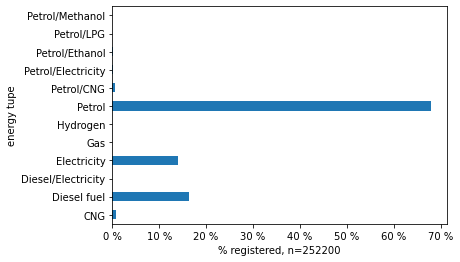

In [28]:

df3 = pd.crosstab(df3['kayttovoimat'], 'lkm')


df3.columns.name=''


n = df3['lkm'].sum()
df3['%'] = (df3['lkm']/n)*100


df3.loc['Total'] = df2.sum()


df3.style.format({'lkm': '{:.0f}', '%': '{:.1f} %'})


ax1 = df3.drop('Total')['%'].plot.barh()


ax1.set_ylabel("energy tupe")


ax1.set_xlabel('% registered, n=' + str(n))


ax1.set_xticklabels(['{:.0f} %'.format(x) for x in ax1.get_xticks()])


#plt.savefig('frekvenssi.png', bbox_inches='tight')

### Importing passenger car dataset

In [29]:
df4 = pd.read_csv('passengercars2023.csv')
df4.head()

,ajoneuvoluokka,ensirekisterointipvm,kayttoonottopvm,vari,kayttovoima,iskutilavuus,sahkohybridi,sahkohybridinluokka,merkkiSelvakielinen,mallimerkinta,vaihteisto,kaupallinenNimi,kunta,NEDC_Co2,NEDC2_Co2,WLTP_Co2,WLTP2_Co2
0,M1,2021-01-01,20210101,8,1.0,1395.0,True,1.0,Seat,CUPRA LEON SPORTSTOURER Farmari (AC) 5ov 1395c...,2,CUPRA LEON SPORTSTOURER,858.0,NaN,NaN,NaN,31.0
1,M1,2021-01-01,20210101,9,1.0,1395.0,True,1.0,Seat,LEON SPORTSTOURER Farmari (AC) 5ov 1395cm3 A,2,LEON SPORTSTOURER,257.0,NaN,NaN,NaN,28.0
2,M1,2021-01-01,20210101,9,1.0,1987.0,True,2.0,Toyota,TOYOTA COROLLA Farmari (AC) 4ov 1987cm3,3,TOYOTA COROLLA,285.0,85.0,NaN,112.0,NaN
3,M1,2021-01-01,20210101,1,1.0,1482.0,True,2.0,Hyundai,i 30 Farmari (AC) 5ov 1482cm3 A,2,i 30,837.0,113.0,NaN,125.0,NaN
4,M1,2021-01-01,20210101,9,1.0,1395.0,True,1.0,Skoda,OCTAVIA RS Sedan (AA) 5ov 1395cm3 A,2,OCTAVIA RS,837.0,NaN,NaN,NaN,25.0


In [30]:

gears = {'1':'Manual',      
    '2':'Automatic',
    '3':'Stepless',
    '4':'Manual/automatic',
    '5':'Variator',
    '6':'Variable transmission',
    '7':'Foot-shifted',
    'X':'Not applicable',
    'Y':'Other'}
df4['vaihteistot'] = df4['vaihteisto'].replace(gears)

In [31]:

df4 = pd.crosstab(df4['vaihteistot'], 'Total')


df4.columns.name=''


n = df4['Total'].sum()
df4['%'] = (df4['Total'] / n) * 100


df4.loc['Total'] = df4.sum()


df4.style.format({'Total' : '{:.0f}', '%' : '{:.1f}'})

,Total,%
vaihteistot,,
1.0,1,0.0
8,7123,2.8
9,281,0.1
Automatic,155224,61.7
Foot-shifted,4,0.0
Manual,29539,11.7
Manual/automatic,11,0.0
Not applicable,2114,0.8
Other,16695,6.6


### Importing passenger car dataset

In [32]:
df5 = pd.read_csv('passengercars2023.csv')
df5.head()

,ajoneuvoluokka,ensirekisterointipvm,kayttoonottopvm,vari,kayttovoima,iskutilavuus,sahkohybridi,sahkohybridinluokka,merkkiSelvakielinen,mallimerkinta,vaihteisto,kaupallinenNimi,kunta,NEDC_Co2,NEDC2_Co2,WLTP_Co2,WLTP2_Co2
0,M1,2021-01-01,20210101,8,1.0,1395.0,True,1.0,Seat,CUPRA LEON SPORTSTOURER Farmari (AC) 5ov 1395c...,2,CUPRA LEON SPORTSTOURER,858.0,NaN,NaN,NaN,31.0
1,M1,2021-01-01,20210101,9,1.0,1395.0,True,1.0,Seat,LEON SPORTSTOURER Farmari (AC) 5ov 1395cm3 A,2,LEON SPORTSTOURER,257.0,NaN,NaN,NaN,28.0
2,M1,2021-01-01,20210101,9,1.0,1987.0,True,2.0,Toyota,TOYOTA COROLLA Farmari (AC) 4ov 1987cm3,3,TOYOTA COROLLA,285.0,85.0,NaN,112.0,NaN
3,M1,2021-01-01,20210101,1,1.0,1482.0,True,2.0,Hyundai,i 30 Farmari (AC) 5ov 1482cm3 A,2,i 30,837.0,113.0,NaN,125.0,NaN
4,M1,2021-01-01,20210101,9,1.0,1395.0,True,1.0,Skoda,OCTAVIA RS Sedan (AA) 5ov 1395cm3 A,2,OCTAVIA RS,837.0,NaN,NaN,NaN,25.0


In [33]:

df_suositut = pd.crosstab(df5['mallimerkinta'], 'Lukumäärä').nlargest(n = 20, columns = 'Lukumäärä' )
df_suositut

col_0,Lukumäärä
mallimerkinta,
TOYOTA YARIS Viistoperä (AB) 4ov 1490cm3,6681
TOYOTA COROLLA Farmari (AC) 4ov 1798cm3,6421
TOYOTA RAV4 Farmari (AC) 4ov 2487cm3,5068
Model 3 Sedan (AA) 4ov,4784
XC60 Farmari (AC) 5ov 1969cm3 A,4699
TOYOTA C-HR Viistoperä (AB) 4ov 1798cm3,3548
V60 Farmari (AC) 5ov 1969cm3 A,3145
PASSAT Farmari (AC) 5ov 1395cm3 A,2632
Nissan Qashqai Monikäyttöajoneuvo (AF) 4ov 1332cm3,2279


### Importing passenger car dataset

In [34]:
df6 = pd.read_csv('passengercars2023.csv')
df6.head()

,ajoneuvoluokka,ensirekisterointipvm,kayttoonottopvm,vari,kayttovoima,iskutilavuus,sahkohybridi,sahkohybridinluokka,merkkiSelvakielinen,mallimerkinta,vaihteisto,kaupallinenNimi,kunta,NEDC_Co2,NEDC2_Co2,WLTP_Co2,WLTP2_Co2
0,M1,2021-01-01,20210101,8,1.0,1395.0,True,1.0,Seat,CUPRA LEON SPORTSTOURER Farmari (AC) 5ov 1395c...,2,CUPRA LEON SPORTSTOURER,858.0,NaN,NaN,NaN,31.0
1,M1,2021-01-01,20210101,9,1.0,1395.0,True,1.0,Seat,LEON SPORTSTOURER Farmari (AC) 5ov 1395cm3 A,2,LEON SPORTSTOURER,257.0,NaN,NaN,NaN,28.0
2,M1,2021-01-01,20210101,9,1.0,1987.0,True,2.0,Toyota,TOYOTA COROLLA Farmari (AC) 4ov 1987cm3,3,TOYOTA COROLLA,285.0,85.0,NaN,112.0,NaN
3,M1,2021-01-01,20210101,1,1.0,1482.0,True,2.0,Hyundai,i 30 Farmari (AC) 5ov 1482cm3 A,2,i 30,837.0,113.0,NaN,125.0,NaN
4,M1,2021-01-01,20210101,9,1.0,1395.0,True,1.0,Skoda,OCTAVIA RS Sedan (AA) 5ov 1395cm3 A,2,OCTAVIA RS,837.0,NaN,NaN,NaN,25.0


In [35]:
enginetype = {1:'Petrol',
    2:'Diesel fuel',
    3:'Fuel oil',
    4:'Electricity',
    5:'Hydrogen',
    6:'Gas',
    7:'Methanol',
    10:'Biodiesel fuel',
    11:'LPG',
    13:'CNG',
    31:'Light fuel oil (kerosene)',
    32:'Diesel/Wood',
    33:'Petrol/Wood',
    34:'Petrol+light fuel oil (kerosene)',
    37:'Ethanol',
    38:'Petrol/CNG',
    39:'Petrol/Electricity',
    40:'Petrol/Ethanol',
    41:'Petrol/Methanol',
    42:'Petrol/LPG',
    43:'Diesel/CNG',
    44:'Diesel/Electricity',
    45:'Diesel/Ethanol',
    46:'Diesel/Metanoli',
    47:'Diesel/LPG',
    48:'Diesel/Biodiesel',
    49:'Diesel/Biodiesel/Electricity',
    50:'Diesel/Biodiesel/Ethanol',
    51:'Diesel/Biodiesel/Methanol',
    52:'Diesel/Biodiesel/LPG',
    53:'Diesel/Biodiesel/CNG',
    54:'Hydrogen/Electricity',
    55:'Diesel fuel/Other',
    56:'H Natural Gas',
    57:'L Natural Gas',
    58:'HL Natural Gas',
    59:'CNG/Biomethan',
    60:'Biometaani',
    61:'Wood',
    62:'Ethanol (ED95)',
    63:'Ethanol (E85)',
    64:'H2NG',
    65:'LNG',
    66:'LNG20',
    67:'Diesel/LNG',
    68:'Diesel/LNG20',
    'X':'Not applicable',
    'Y':'Other'}
df6['kayttovoimat'] = df6['kayttovoima'].replace(enginetype)

In [36]:

dummies = pd.get_dummies(df6['kayttovoimat'], prefix = 'kayttovoima')


df7 = pd.concat([df6, dummies], axis = 1)


df7.to_csv('electricitycars2023.csv', index = False)

In [37]:
df7.head(5)

,ajoneuvoluokka,ensirekisterointipvm,kayttoonottopvm,vari,kayttovoima,iskutilavuus,sahkohybridi,sahkohybridinluokka,merkkiSelvakielinen,mallimerkinta,...,kayttovoima_Diesel/Electricity,kayttovoima_Electricity,kayttovoima_Gas,kayttovoima_Hydrogen,kayttovoima_Petrol,kayttovoima_Petrol/CNG,kayttovoima_Petrol/Electricity,kayttovoima_Petrol/Ethanol,kayttovoima_Petrol/LPG,kayttovoima_Petrol/Methanol
0,M1,2021-01-01,20210101,8,1.0,1395.0,True,1.0,Seat,CUPRA LEON SPORTSTOURER Farmari (AC) 5ov 1395c...,...,0,0,0,0,1,0,0,0,0,0
1,M1,2021-01-01,20210101,9,1.0,1395.0,True,1.0,Seat,LEON SPORTSTOURER Farmari (AC) 5ov 1395cm3 A,...,0,0,0,0,1,0,0,0,0,0
2,M1,2021-01-01,20210101,9,1.0,1987.0,True,2.0,Toyota,TOYOTA COROLLA Farmari (AC) 4ov 1987cm3,...,0,0,0,0,1,0,0,0,0,0
3,M1,2021-01-01,20210101,1,1.0,1482.0,True,2.0,Hyundai,i 30 Farmari (AC) 5ov 1482cm3 A,...,0,0,0,0,1,0,0,0,0,0
4,M1,2021-01-01,20210101,9,1.0,1395.0,True,1.0,Skoda,OCTAVIA RS Sedan (AA) 5ov 1395cm3 A,...,0,0,0,0,1,0,0,0,0,0
